In [1]:
import os
import sys
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import numpy as np

In [2]:
np.random.seed(2019)

In [3]:
(train_img, train_label), (test_img, test_label) = mnist.load_data()

In [4]:
train_img = train_img / 255.
test_img = test_img / 255.

In [36]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28), name="l_0"),
        keras.layers.Dense(200, activation=keras.activations.relu, 
                           kernel_regularizer=keras.regularizers.l2(.001), 
                           name="l_1"),
        keras.layers.Dropout(0.2, name='dropout_0'),
        keras.layers.Dense(10, activation='softmax', name="l_out")
])

In [11]:
model_layers = model.get_config()['layers']

In [22]:
classes = {i['config']['name']: i['class_name'] for i in model_layers}

In [33]:
model.get_layer(name="l_out").get_weights()

[array([[-0.02919944,  0.15697628,  0.01391889, ...,  0.09848773,
         -0.02452192,  0.07644702],
        [-0.14307222,  0.04356956, -0.03453356, ...,  0.0199192 ,
          0.01831426, -0.1267863 ],
        [ 0.07287753, -0.09157741, -0.10506815, ..., -0.14354499,
          0.1286307 , -0.09386021],
        ...,
        [ 0.00583534,  0.1426217 ,  0.10171345, ...,  0.02113752,
          0.01909862,  0.10470453],
        [-0.16027296,  0.01690714, -0.05655985, ...,  0.12413594,
         -0.02439372, -0.15552616],
        [ 0.04923321,  0.00976746, -0.00904165, ...,  0.00570944,
          0.01508521, -0.09731445]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]

In [37]:
LEARNING_RATE = .0001
LIMIT_EPOCHS = int(1e4)

def scheduler(epoch):
  if epoch < 10:
    return LEARNING_RATE
  else:
    return LEARNING_RATE * tf.math.exp(0.1 * (10 - epoch))

In [39]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

In [40]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', 
                                  min_delta=1e-2, 
                                  patience=2, 
                                  verbose=0, 
                                  mode='min', 
                                  baseline=None, 
                                  restore_best_weights=True),
    keras.callbacks.LearningRateScheduler(scheduler)
]

In [42]:
h = model.fit(x=train_img[:1], y=train_label[:1], 
          validation_data=(test_img, test_label),  
          batch_size=64, epochs=LIMIT_EPOCHS, 
          use_multiprocessing=True, workers=4,
          shuffle=True, 
          callbacks=callbacks)

Train on 1 samples, validate on 10000 samples
Epoch 1/10000
1/1 [==============================] - 0s 456ms/sample - loss: 3.1521 - acc: 0.0000e+00 - val_loss: 2.6274 - val_acc: 0.1445
Epoch 2/10000
1/1 [==============================] - 0s 363ms/sample - loss: 2.8903 - acc: 0.0000e+00 - val_loss: 2.6257 - val_acc: 0.1445
Epoch 3/10000
1/1 [==============================] - 0s 385ms/sample - loss: 2.7215 - acc: 0.0000e+00 - val_loss: 2.6242 - val_acc: 0.1447


In [44]:
h.epoch()

[0, 1, 2]

In [45]:
h.history

{'loss': [3.152125835418701, 2.8903098106384277, 2.721501350402832],
 'acc': [0.0, 0.0, 0.0],
 'val_loss': [2.627379465484619, 2.6257253746032716, 2.6242190551757814],
 'val_acc': [0.1445, 0.1445, 0.1447],
 'lr': [1e-04, 1e-04, 1e-04]}

In [97]:
def model_train_history_as_json(train_history: keras.callbacks.History) -> dict:
    """ Function to convert History object into a json """
    
    def _type_cast(lst):
        """ Cast numpy to in-built py types"""
        
        if 'numpy.float' in str(type(lst[0])):
            return [float(i) for i in lst]
        if 'numpy.int' in str(type(lst[0])):
            return [int(i) for i in lst]
        return lst
        
    print({k: _type_cast(v) for k, v in train_history.history.items()})
    
    history_json = {k: _type_cast(v) for k, v in train_history.history}
    
    
    history_json['epoch'] = train_history.epoch
    
    return json.dumps(history_json)

In [98]:
model_train_history_as_json(h)

{'loss': [3.152125835418701, 2.8903098106384277, 2.721501350402832], 'acc': [0.0, 0.0, 0.0], 'val_loss': [2.627379465484619, 2.6257253746032716, 2.6242190551757814], 'val_acc': [0.1445000022649765, 0.1445000022649765, 0.14470000565052032], 'lr': [9.999999747378752e-05, 9.999999747378752e-05, 9.999999747378752e-05], 'epoch': [0, 1, 2]}


ValueError: too many values to unpack (expected 2)

In [92]:
'numpy.int' in str(type(h.history['loss'][0]))

False

type

In [23]:
model.save("mnist_model")

In [17]:
with tf.Session() as session:
    m = tf.saved_model.load(session, ["model_py"], "mnist_model_py.tf_v1")
    m

<built-in method __dir__ of MetaGraphDef object at 0x133887e90>


In [19]:
import cv2
import matplotlib.pyplot as plt

In [28]:
PATH_IMG = 'example5.png'

In [29]:
img_test = cv2.imread(PATH_IMG, cv2.IMREAD_GRAYSCALE)

In [17]:
img_test = cv2.resize(img_test, (28, 28), interpolation=cv2.INTER_CUBIC)

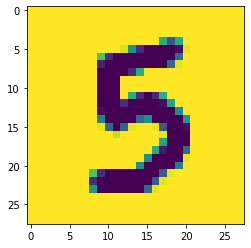

In [30]:
plt.imshow(img_test)

In [32]:
img_test = img_test / 255.

In [31]:
img_test.shape

(28, 28)

In [34]:
predict = model.predict(img_test.reshape(1,28,28))

In [95]:
test_label[0:1]

array([7], dtype=uint8)